In [1]:
!pip install -q transformers datasets torch accelerate pandas numpy matplotlib seaborn scikit-learn


In [2]:
import torch
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    AutoModelForSeq2SeqLM
)


In [3]:
models = {
    "gpt2": {
        "type": "causal",
        "model_name": "gpt2"
    },
    "distilgpt2": {
        "type": "causal",
        "model_name": "distilgpt2"
    },
    "gpt-neo-125M": {
        "type": "causal",
        "model_name": "EleutherAI/gpt-neo-125M"
    },
    "t5-base": {
        "type": "seq2seq",
        "model_name": "t5-base"
    },
    "bart-large": {
        "type": "seq2seq",
        "model_name": "facebook/bart-large"
    }
}


In [4]:
prompts = [
    "Artificial intelligence is transforming the world because",
    "Climate change is a serious global problem since",
    "In the future, technology will"
]


In [5]:
def get_model_size(model):
    total_size = 0
    for param in model.parameters():
        total_size += param.nelement() * param.element_size()
    return total_size / (1024 ** 2)  # MB


def count_parameters(model):
    return sum(p.numel() for p in model.parameters()) / 1e6  # Millions


In [6]:
results = []

device = "cuda" if torch.cuda.is_available() else "cpu"

for model_key, info in models.items():
    print(f"Running {model_key}...")

    tokenizer = AutoTokenizer.from_pretrained(info["model_name"])

    if info["type"] == "causal":
        model = AutoModelForCausalLM.from_pretrained(info["model_name"])
    else:
        model = AutoModelForSeq2SeqLM.from_pretrained(info["model_name"])

    model.to(device)
    model.eval()

    start_time = time.time()
    total_length = 0

    for prompt in prompts:
        inputs = tokenizer(prompt, return_tensors="pt").to(device)

        with torch.no_grad():
            output = model.generate(
                **inputs,
                max_length=60,
                do_sample=True,
                top_k=50
            )

        generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
        total_length += len(generated_text.split())

    end_time = time.time()

    results.append({
        "Model": model_key,
        "Inference_Time": round(end_time - start_time, 2),
        "Model_Size_MB": round(get_model_size(model), 2),
        "Parameters_M": round(count_parameters(model), 2),
        "Avg_Text_Length": round(total_length / len(prompts), 2)
    })


Running gpt2...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Running distilgpt2...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Running gpt-neo-125M...


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Running t5-base...


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Running bart-large...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

In [7]:
df = pd.DataFrame(results)
df


,Model,Inference_Time,Model_Size_MB,Parameters_M,Avg_Text_Length
0,gpt2,15.99,474.70,124.44,52.33
1,distilgpt2,8.57,312.47,81.91,43.00
2,gpt-neo-125M,11.45,477.59,125.20,51.33
3,t5-base,8.07,850.31,222.90,24.33
4,bart-large,10.80,1549.88,406.29,6.67


In [8]:
df.to_csv("decision_matrix.csv", index=False)


In [9]:
weights = np.array([0.25, 0.25, 0.25, 0.25])


In [10]:
impacts = np.array([-1, -1, -1, 1])


In [11]:
matrix = df.iloc[:, 1:].values.astype(float)

# Step 1: Normalize
norm_matrix = matrix / np.sqrt((matrix ** 2).sum(axis=0))

# Step 2: Weighted normalization
weighted_matrix = norm_matrix * weights

# Step 3: Ideal best & worst
ideal_best = np.where(impacts == 1, weighted_matrix.max(axis=0), weighted_matrix.min(axis=0))
ideal_worst = np.where(impacts == 1, weighted_matrix.min(axis=0), weighted_matrix.max(axis=0))

# Step 4: Distance
dist_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

# Step 5: TOPSIS score
topsis_score = dist_worst / (dist_best + dist_worst)

df["TOPSIS_Score"] = topsis_score
df["Rank"] = df["TOPSIS_Score"].rank(ascending=False)

df.sort_values("Rank")


,Model,Inference_Time,Model_Size_MB,Parameters_M,Avg_Text_Length,TOPSIS_Score,Rank
1,distilgpt2,8.57,312.47,81.91,43.00,0.906850,1.0
2,gpt-neo-125M,11.45,477.59,125.20,51.33,0.840634,2.0
0,gpt2,15.99,474.70,124.44,52.33,0.738581,3.0
3,t5-base,8.07,850.31,222.90,24.33,0.556129,4.0
4,bart-large,10.80,1549.88,406.29,6.67,0.162778,5.0


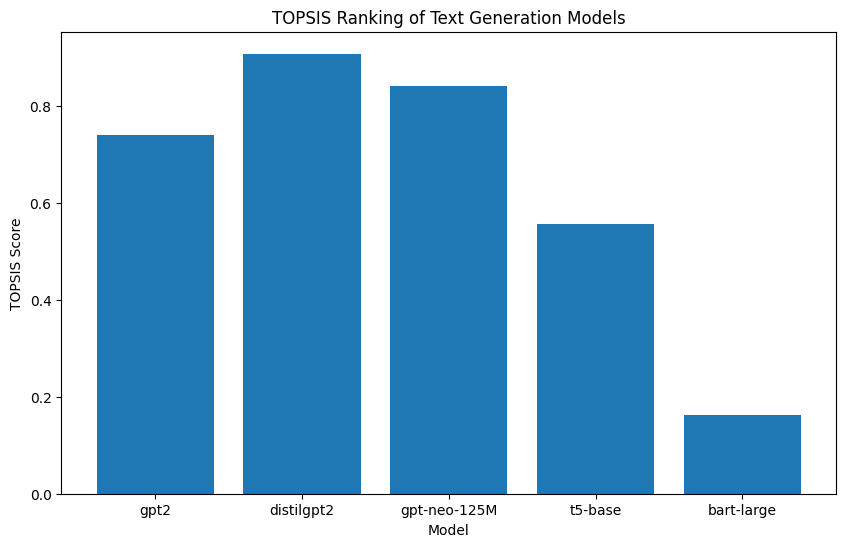

In [12]:
plt.figure(figsize=(10,6))
plt.bar(df["Model"], df["TOPSIS_Score"])
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Text Generation Models")
plt.show()


In [13]:
df.to_csv("final_topsis_results.csv", index=False)
